In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import PCA_functions as pcf

## N.B.
The data must be in the following format:
| Data Points Names | Variable 1    | Variable 2    | ...           |
| -------------     | ------------- | ------------- | ------------- |
| Data Point Name 1 | ####          | ####          | ...           |
| Data Point Name 2 | ####          | ####          | ...           |
| ...               | ...           | ...           | ...           |

Should it not be, transpose the data (for a numpy array ```array```, you can use ```array.T```)

In [14]:
file = r'.\Data_for_PCA.csv'
df = pd.read_csv(file)
a = df.to_numpy()[:,5:]
wl = np.array(list(df.columns)[5:]).astype(int)
no_of_spectra = len(a[:,0])

In [15]:
Type = df['Type'].to_numpy()
Caramel_Colour = df['Caramel Colour'].to_numpy()
Age = df['Age'].to_numpy()
Location = df['Location'].to_numpy()

(200.0, 600.0)

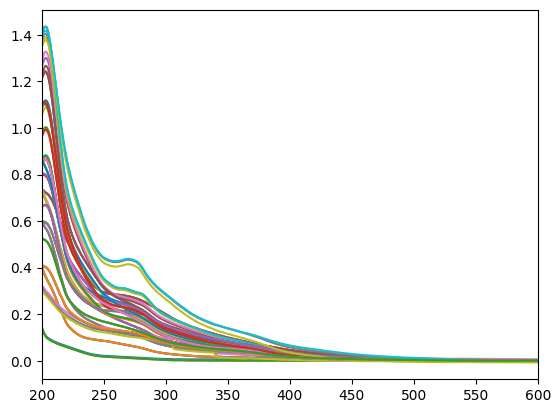

In [16]:
fig1 = plt.figure()
ax1 = fig1.add_subplot()
for i in range(no_of_spectra):
    ax1.plot(wl,a[i,:])
ax1.set_xlim(np.min(wl),np.max(wl))

In [17]:
snv = pcf.SNV_matrix(a)

(200.0, 600.0)

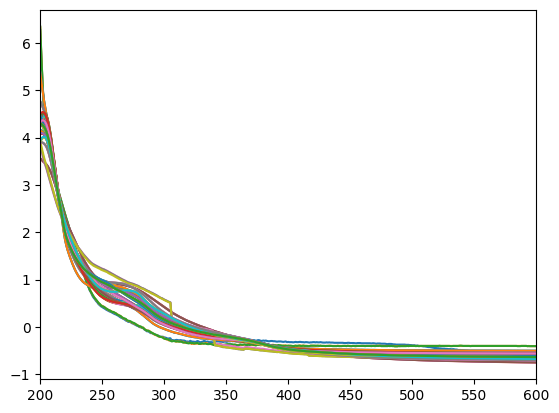

In [18]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
for i in range(no_of_spectra):
    ax2.plot(wl,snv[i,:])
ax2.set_xlim(np.min(wl),np.max(wl))

In [19]:
scores_values, variance_ratio, PCs, loadings = pcf.get_pca_data(a,'SNV',5)

In [20]:
Type_dic = {
    'NaN':'tab:blue' ,
    'Single Malt':'red' ,
    'Bourbon':'tab:brown' ,
    'Double oaked bourbon':'tab:cyan' ,
    'Single barrel bourbon':'orange' ,
    'Rum':'tab:olive' ,
    'Blended':'purple'
}

In [21]:
chosen_PCs = [1,2]

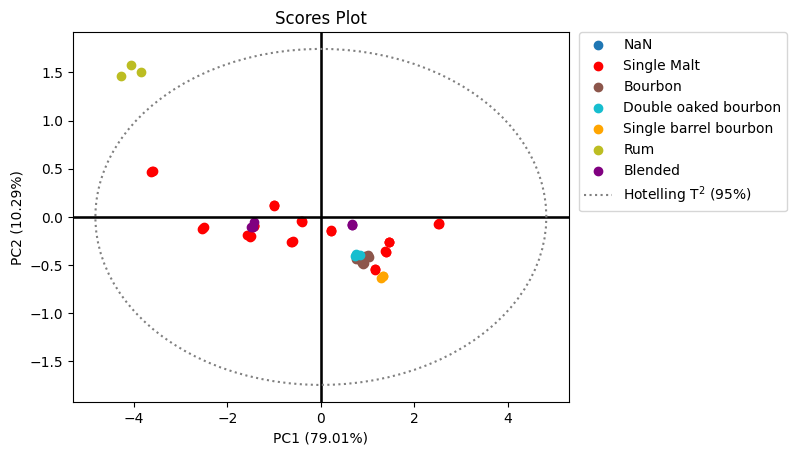

In [ ]:

fig_scores = plt.figure()
ax_scores = fig_scores.add_subplot()

for t in Type_dic:
    # chosen_scores = Type_tuple[i][0]
    chosen_scores = scores_values[np.where(Type == t)]
    label = t
    c = Type_dic[t]
    pcf.scores_plot(chosen_scores,chosen_PCs,fig_scores,ax_scores,label=label,c=c,variance_ratio=variance_ratio)

pcf.Hotelling(scores_values,chosen_PCs,ax_scores)

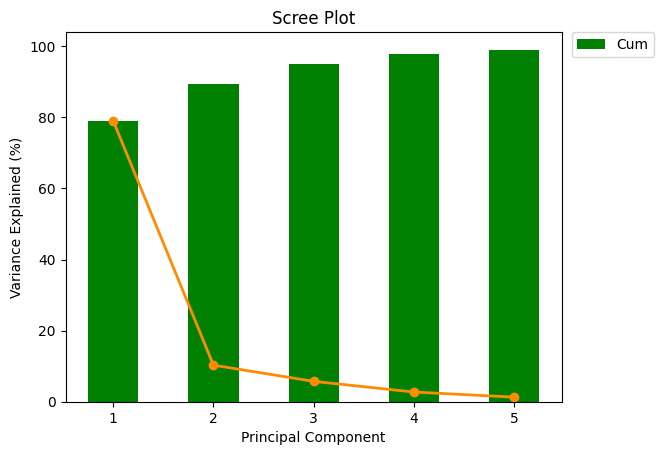

In [23]:
pcf.scree_plot(PCs,variance_ratio)

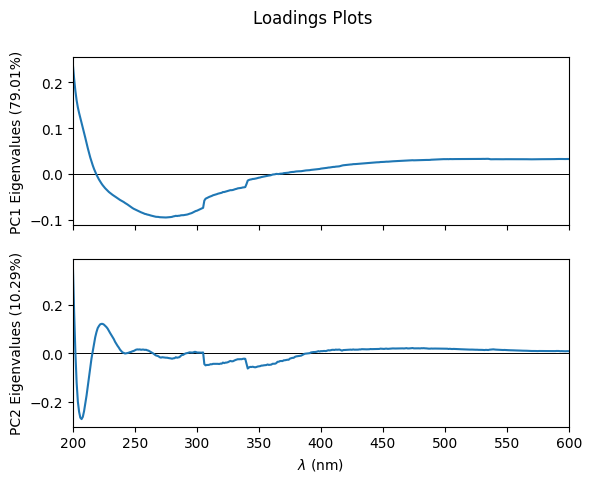

In [24]:
pcf.loadings_plot(wl,loadings,chosen_PCs,variance_ratio=variance_ratio,xlabel='$\lambda$ (nm)')